In [12]:
#importar librerias
import json
import numpy as np
import pandas as pd
import os
from shutil import copyfile
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import split_folders
from PIL import ImageFile
from PIL import Image
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import matplotlib.pyplot as plt
from keras.models import load_model
from os.path import isfile, join
from os import listdir
from cv2 import imread
from cv2 import imwrite
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
from cv2 import cvtColor
from cv2 import COLOR_RGB2BGR
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from IPython.display import clear_output
import sys
import ipywidgets as widgets
from IPython.display import display
import shutil

In [24]:
#setear carpetas
TOP_DATA = "/home/mimus/Desktop/fv/topwanted/"
ALL_DATA = "/home/mimus/Desktop/fv/allwanted/"
FACES = '/home/mimus/Desktop/fv/faces/'
DATA_DIR = "/home/mimus/Desktop/fv/fotos_medico/"
FIT_DATA ="/home/mimus/Desktop/fv/fit/"
val_dir = "/home/mimus/Desktop/fv/fit/val/"
train_dir = "/home/mimus/Desktop/fv/fit/train/"
test_dir = "/home/mimus/Desktop/fv/fit/test/"
predict = '/home/mimus/Desktop/fv/perdictions/preds/'
crops = '/home/mimus/Desktop/fv/predictions/crops/'
carpetas = [TOP_DATA, ALL_DATA, FACES, DATA_DIR, FIT_DATA,val_dir ,train_dir ,test_dir]

for carpeta in carpetas:
    if not os.path.exists(carpeta):
        os.mkdir(carpeta)

In [14]:
df_faces = pd.read_csv("/home/mimus/Desktop/fv/data estructurada/data_cleaned.csv",encoding="latin-1", index_col=0)
#creamos una lista de nombres
df_faces_nombre = df_faces.groupby(["Nombre"])
max_names = len(df_faces_nombre)
print(max_names)

59030


In [15]:
#pa que no tire errores
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
ImageFile.LOAD_TRUNCATED_IMAGES = True

/home/mimus/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [16]:
from keras_vggface.vggface import VGGFace
conv_base = VGGFace(include_top=False, input_shape=(224, 224, 3))

In [17]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(907, activation='softmax'))
conv_base.trainable = False
#compilando modelo
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [18]:
with open('/home/mimus/Desktop/fv/data estructurada/dict.json', 'r') as f:
    labels = json.load(f)

Found 5010 images belonging to 10 classes.
Found 78 images belonging to 10 classes.
Found 94 images belonging to 10 classes.


In [20]:
model = load_model('Top989_t9334.h5')

/home/mimus/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [21]:
#calculos para tamaño de particiones
max_names/1000
partition=np.zeros(354)

for n in range(0,354):    
    partition[n]= max_names-n*(1000)
    partition[n]
partition = partition[0:354].astype(int)




[  59030   57030   55030   53030   51030   49030   47030   45030   43030
   41030   39030   37030   35030   33030   31030   29030   27030   25030
   23030   21030   19030   17030   15030   13030   11030    9030    7030
    5030    3030    1030    -970   -2970   -4970   -6970   -8970  -10970
  -12970  -14970  -16970  -18970  -20970  -22970  -24970  -26970  -28970
  -30970  -32970  -34970  -36970  -38970  -40970  -42970  -44970  -46970
  -48970  -50970  -52970  -54970  -56970  -58970  -60970  -62970  -64970
  -66970  -68970  -70970  -72970  -74970  -76970  -78970  -80970  -82970
  -84970  -86970  -88970  -90970  -92970  -94970  -96970  -98970 -100970
 -102970 -104970 -106970 -108970 -110970 -112970 -114970 -116970 -118970
 -120970 -122970 -124970 -126970 -128970 -130970 -132970 -134970 -136970
 -138970 -140970 -142970 -144970 -146970 -148970 -150970 -152970 -154970
 -156970 -158970 -160970 -162970 -164970 -166970 -168970 -170970 -172970
 -174970 -176970 -178970 -180970 -182970 -184970 -1

In [ ]:
prup = 1

In [25]:
shutil.rmtree('/home/mimus/Desktop/fv/perdictions/preds/')
shutil.rmtree('/home/mimus/Desktop/fv/perdictions/crops/')
os.mkdir(crops)
os.mkdir(predict)
print(prup)

In [26]:
all_names = df_faces_nombre.count().sort_values(by=['foto'], ascending=False).iloc[partition[prup]:partition[prup-1]]["foto"].index

#crear carpeta por persona y copiar fotos de cada persona
for name in all_names:

    fotos = df_faces_nombre.get_group(name)["foto"]
    os.mkdir(predict + name)
    for foto in fotos:
        if type(foto) == str and os.path.exists(DATA_DIR+foto):
            try:
                copyfile(DATA_DIR+foto, predict + name + '/' + foto)
            except:
                print(foto)

28


2000


IntProgress(value=0, max=2000)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



/home/mimus/anaconda3/envs/tf-cpu/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


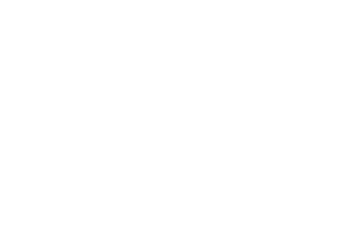

In [27]:
#crear folder y copiar caras para crear cropeo
# draw each face separately
names = [l for l in listdir(predict) if os.path.isdir(join(predict,l)) ]
print(len(names))
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    k = 1
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        if x1 <0:
            x1=0
        if x2 <0:
            x2=0
        if y1 <0:
            y1=0
        if y2 <0:
            y2=0
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        lalala = cvtColor(data[y1:y2, x1:x2], COLOR_RGB2BGR)
        outfile = '%s/%s_%s' % (crops+name + '/predo', k, file)
        imwrite(outfile,lalala)
        k +=1

final_val = len(names)
progress = widgets.IntProgress(value=0, min=0, max=final_val)
display(progress, progress.value)        
        
for name in names:
    onlyfiles = [ f for f in listdir(os.path.join(predict,name)) ]
    os.mkdir(os.path.join(crops,name))
    os.mkdir(os.path.join(crops+name,'predo'))
    progress.value +=1
    for file in onlyfiles:
        filename = '%s/%s' % (predict + name, file)
        # load image from file
        pixels = pyplot.imread(filename)
        # create the detector, using default weights
        detector = MTCNN()
        #detect faces in the image
        faces = detector.detect_faces(pixels)
        faces2 = faces[:1]
        for i in faces:
            if i['confidence']>.99:
                faces2.append(i)
        k=len(faces2)
        faces2=faces2[1:k]
        # display faces on the original image
        draw_faces(filename, faces2) 

In [68]:
#CREACION DE BOTONES
j=2
button_si = widgets.Button(description="Si!")
button_no = widgets.Button(description="No!")
button_NAN = widgets.Button(description="No puedo decidir")
outputsi = widgets.Output()
outputno = widgets.Output()
outputNAN = widgets.Output()
def on_button_si_clicked(b):
    with outputsi:
        clear_output()
        global j
        global df_trackeds
        df_trackeds = df_trackeds.append(pd.DataFrame({'se parece':['si']}))
        print('gracias, pasa al siguiente',j)
        j +=1
button_si.on_click(on_button_si_clicked)
def on_button_no_clicked(b):
    with outputno:
        clear_output()
        global df_trackeds
        global j
        df_trackeds = df_trackeds.append(pd.DataFrame({'se parece':['no']}))
        print('gracias, pasa al siguiente',j)
        j +=1
button_no.on_click(on_button_no_clicked)
def on_button_NAN_clicked(b):
    with outputNAN:
        clear_output() 
        global df_trackeds
        global j
        df_trackeds = df_trackeds.append(pd.DataFrame({'se parece':['no puedo decidir']}))
        print('gracias, pasa al siguiente',j)       
        j +=1
button_NAN.on_click(on_button_NAN_clicked)

In [69]:
names_pred = [l for l in listdir(crops) if os.path.isdir(join(crops,l)) ]
o = 1
trackeds = {'se parece':[]}
df_trackeds = pd.DataFrame(trackeds) 
datatl = {'name':[],'proba':[],'name2':[]}
df_datatl = pd.DataFrame(datatl) 

for name in names_pred:
    df_trackeds2 = df_trackeds
    onlyfiles = [f for f in listdir(predict+name)]
    pred_datagen = ImageDataGenerator(rescale=1./255)
    pred_generator = pred_datagen.flow_from_directory(crops+name, target_size=(160, 160), batch_size=1,class_mode='categorical')
    
    predictions = model.predict_generator(pred_generator, steps=len(listdir((crops+ name + '/predo'))))
    predictions = pd.DataFrame(predictions)
    mean_preds=predictions.mean()
    x = pd.DataFrame.from_dict(labels,orient = 'index').index.to_numpy()
    y = pd.DataFrame.from_dict(mean_preds).to_numpy()
    try:  
        z = np.column_stack((x,y))
        df_predictions = pd.DataFrame(z)
        df_predictions.columns = ['Nombres', 'Probas']
        #para la plot
        plottl = df_predictions.iloc[df_predictions['Probas'].astype(str).astype(float).nlargest(2).index]
        plottl.index = (0,1)
        # Create bars
        
        if plottl.loc[0]['Probas'] > .99:      
            probabili = plottl.loc[0]['Probas']
            named = plottl.loc[0]['Nombres']
            df_datatl = df_datatl.append(pd.DataFrame({'name':[name],'proba':[probabili*100],'name2':[named]})) 
            
            print('fotografia:', o)
            print(name,probabili ,named)
            onlyfiles2 = [ f for f in listdir(os.path.join(TOP_DATA,plottl['Nombres'].iloc[0])) ]
            posibles = plt.figure(figsize=(20,20))           
            for i in range(1,4):
                plt.subplot(1,4,i)
                img = mpimg.imread(TOP_DATA+plottl['Nombres'].iloc[0]+ '/'+ onlyfiles2[i-1])
                plt.imshow(img)
            plt.subplot(1,4,4)
            img0=mpimg.imread((predict+name+ '/'+ onlyfiles[0]))           
            mgplot0 = plt.imshow(img0)
            
            o +=1
            plt.show()
            
            display(button_si,outputsi)
            display(button_no,outputno)
            display(button_NAN,outputNAN)

            
    except:
        pass  
    
 
    

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 1 images belonging to 1 classes.
Found 1 images belonging 

In [70]:
identificados = np.column_stack((df_datatl,df_trackeds))
df_identificados = pd.DataFrame(identificados)
filecsv = '/home/mimus/Desktop/fv/data estructurada/coincidencias/coincidencias%s.csv' %prup
print(filecsv)
export_csv = df_identificados.to_csv (filecsv,encoding="latin-1", header=True)
prup +=1

/home/mimus/Desktop/fv/data estructurada/coincidencias/coincidencias28.csv


In [71]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_identificados)

,0,1,2,3
